# Heart Failure Prediction Dataset

### About Dataset
Similar Datasets
Hepatitis C Dataset: LINK
Body Fat Prediction Dataset: LINK
Cirrhosis Prediction Dataset: LINK
Stroke Prediction Dataset: LINK
Stellar Classification Dataset - SDSS17: LINK
Wind Speed Prediction Dataset: LINK
Spanish Wine Quality Dataset: LINK

## Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Attribute Information
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

## Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations

### Total: 1190 observations
### Duplicated: 272 observations

Final dataset: 918 observations


In [1]:
## libraies 


import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

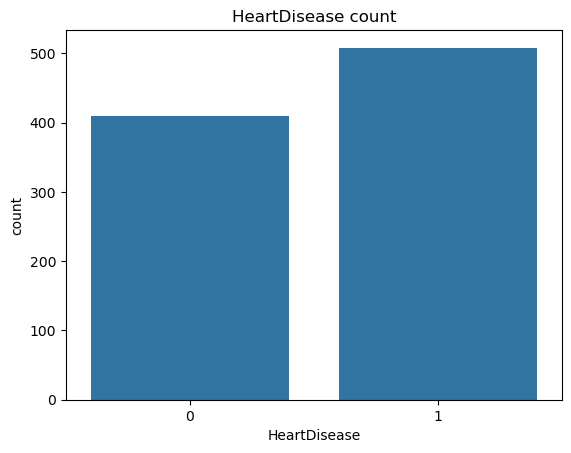

In [6]:
sns.barplot(df['HeartDisease'].value_counts())
plt.title("HeartDisease count")
plt.show()

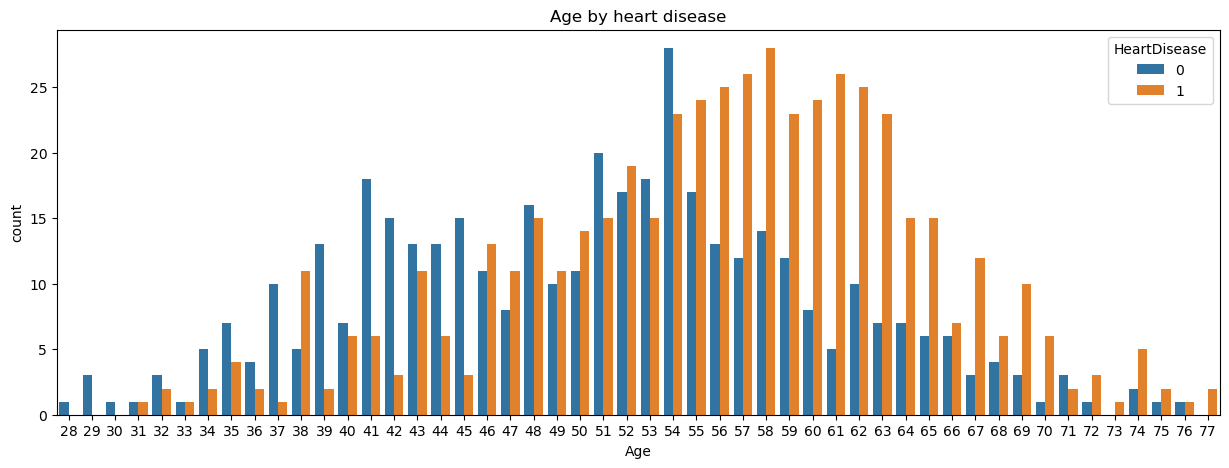

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'Age',hue='HeartDisease')
plt.title('Age by heart disease')
plt.show()

In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


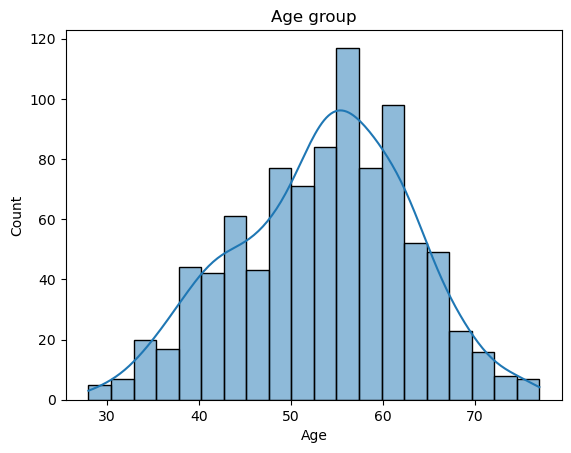

In [10]:
sns.histplot(df["Age"], bins = 20,kde = True)
plt.title("Age group")
plt.show()

In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


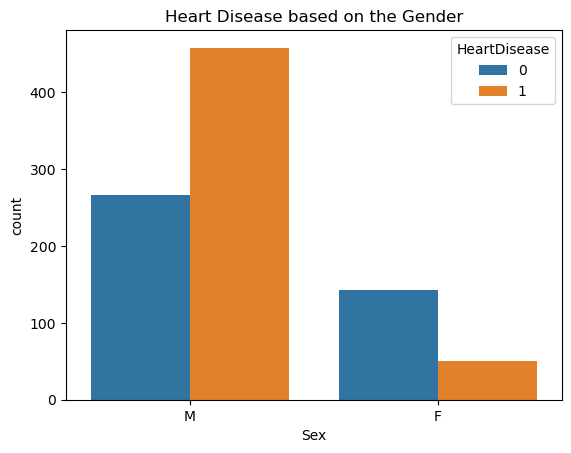

In [12]:
sns.countplot(data=df,x ='Sex',hue='HeartDisease')
plt.title('Heart Disease based on the Gender')
plt.show()

#### This plot indicate the Male has more heartdisease then Female


In [13]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

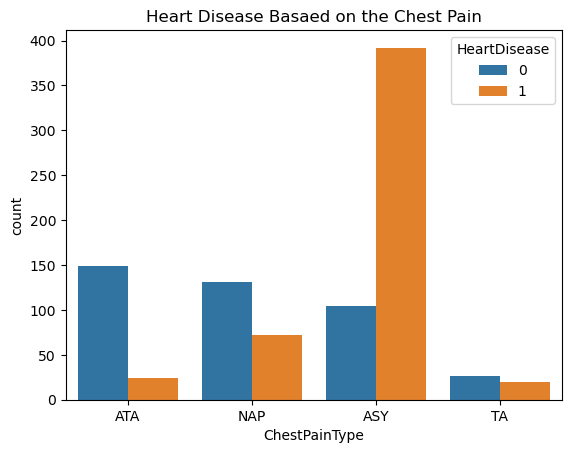

In [14]:
sns.countplot(x = df['ChestPainType'],hue = df['HeartDisease'])
plt.title('Heart Disease Basaed on the Chest Pain')
plt.show()

#### Based on the plot Asymotomatic heart Disease indicate that they have high chance of getting  heart disease

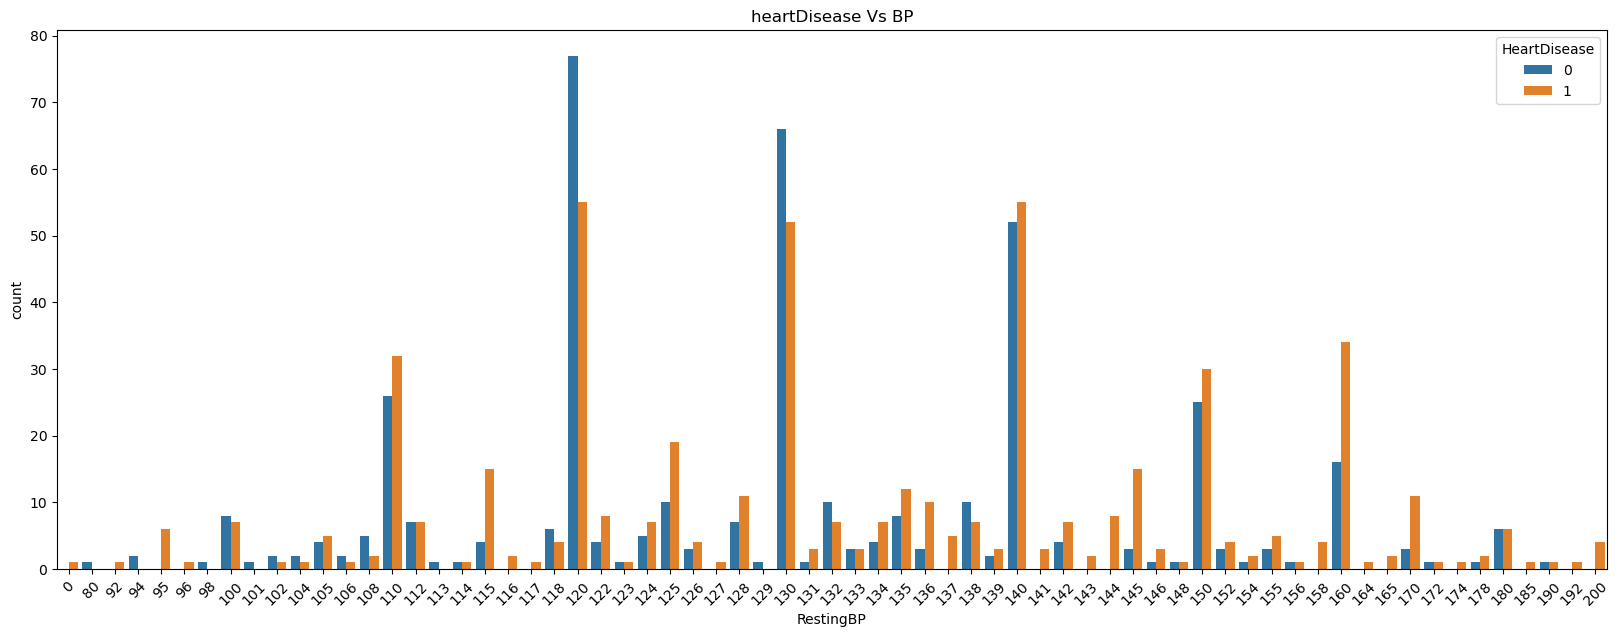

In [15]:
plt.figure(figsize=(20,7))
sns.countplot(data = df,x = 'RestingBP',hue = 'HeartDisease')
plt.xticks(rotation = 45)
plt.title('heartDisease Vs BP')
plt.show()

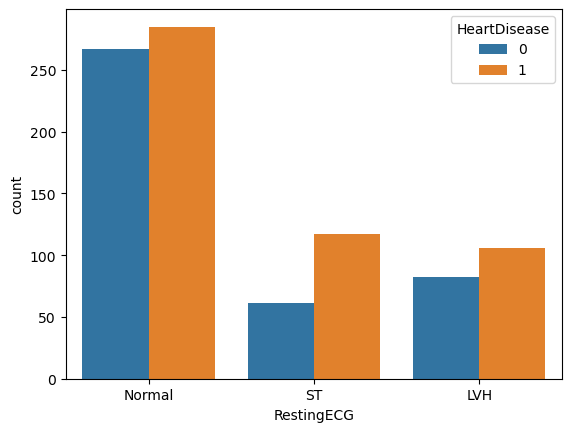

In [16]:
sns.countplot(data=df , x='RestingECG'
              , hue='HeartDisease')
plt.show()

In [17]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Text(0.5, 1.0, 'Suger level may increase the HeartDisease')

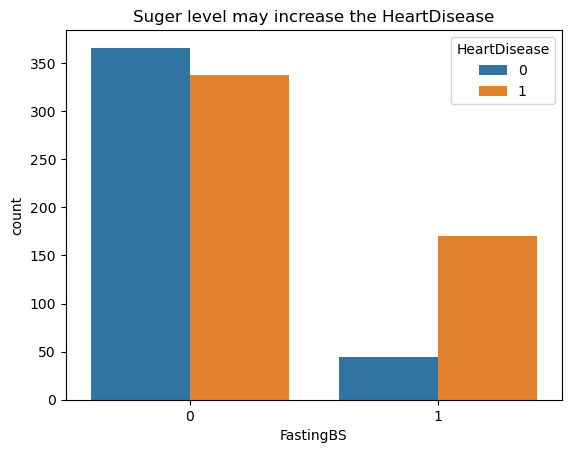

In [18]:
sns.countplot(data=df , x = 'FastingBS',hue='HeartDisease')
plt.title('Suger level may increase the HeartDisease')

## Mapping

In [19]:
df['Sex'] = df['Sex'].map({'F':1,'M':0})

In [20]:
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N':1,'Y':0})

In [21]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,1,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,1,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,1,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,0,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,1,0.0,Up,0


#### People with high fasting blood sugar have a higher chance of heart disease compared to people with normal sugar levels.

## Model Build 

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [23]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [24]:
num_feature = X.select_dtypes(include=['int','float']).columns
cat_feature = X.select_dtypes(include='object').columns

In [25]:
num_transformer = Pipeline(steps=[
    ('Scaler',StandardScaler())
    ])
cat_transformer = Pipeline(steps=[
    ('encode',OneHotEncoder(handle_unknown='ignore'))
])

In [26]:
preprocessor = ColumnTransformer(transformers=[
    ('num_col',num_transformer,num_feature),
    ('cate_col',cat_transformer,cat_feature)
    ])

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
lg_model = Pipeline(steps= [
    ('preprocessor',preprocessor),
    ('classification',LogisticRegression())
    ])

In [29]:
lg_model.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('classification', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_col', ...), ('cate_col', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [30]:
y_lg_pred = lg_model.predict(X_test)
y_lg_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_lg_pred)

0.8532608695652174

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_lg_pred))
print(classification_report(y_test, y_lg_pred))


[[67 10]
 [17 90]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {
    'classification__C': [0.01, 0.1, 1, 10],
    'classification__solver': ['liblinear', 'lbfgs']
}


In [35]:
grid = GridSearchCV(
    estimator=lg_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)


In [36]:
grid.fit(X_train, y_train)

,estimator,Pipeline(step...egression())])
,param_grid,"{'classification__C': [0.01, 0.1, ...], 'classification__solver': ['liblinear', 'lbfgs']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num_col', ...), ('cate_col', ...)]"


In [37]:
print(grid.best_params_)

{'classification__C': 0.1, 'classification__solver': 'liblinear'}


In [38]:
y_grid_pred = grid.predict(X_test)


In [39]:
print(confusion_matrix(y_test, y_grid_pred))
print(classification_report(y_test, y_grid_pred))

[[67 10]
 [17 90]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [40]:
accuracy_score(y_test,y_grid_pred)

0.8532608695652174

In [42]:
pd.to_pickle(lg_model, 'logistic_regression.pkl')